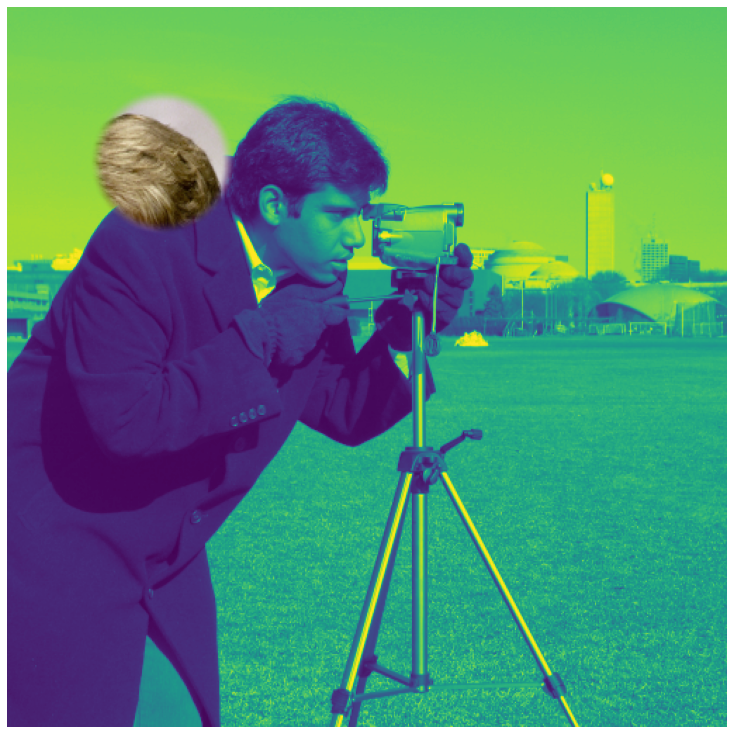

In [94]:
import matplotlib.pyplot as plt 
from skimage import data
import numpy as np

def smoothstep(e0, e1, x):
    t = max(min((x - e0) / (e1 - e0), 1.0), 0.0)
    return t * t * (3.0 - 2.0 * t)

def circular_crop(image):
    width = image.shape[0]
    height = image.shape[1]
    tolerance = 0.1
    min_radius = 0.5 - tolerance
    max_radius = 0.5
    mask = np.zeros((width, height))
    output = np.zeros((width, height, 4))
    for i in range(width):
        for j in range(height):
            v = [i / width, j / height]
            d = np.linalg.norm(v - np.array([0.5, 0.5]))
            s = smoothstep(min_radius, max_radius, d)
            mask[i, j] = 1.0 - s
            output[i, j] = np.append(image[i, j] / 255, [1.0 - s])
    return output
    image_t = np.transpose(image, (2, 0, 1))
    return [[[m, m, m] for m in m1] for m1 in mask]
    return np.transpose(mask * image_t, (1, 2, 0))
            

background_image = data.camera()
image = data.astronaut()
width = image.shape[0]
height = image.shape[1]
radius = 0.5 * np.sqrt(2)
n_pix = 7
origin = [0, 3]
target = [1, 5]
width_cell = width // n_pix
height_cell = height // n_pix
crop = [
    max(0, round((origin[0] + 0.5 - radius) * width_cell)),
    round((origin[0] + 0.5 + radius) * width_cell),
    max(0, round((origin[1] + 0.5 - radius) * height_cell)),
    round((origin[1] + 0.5 + radius) * height_cell)
]
cropped_image = image[crop[0]:crop[1], crop[2]:crop[3]]
masked_image = circular_crop(cropped_image)
plt.figure(figsize=(10, 10))
ax = plt.axes([0, 0, 1, 1], frameon=False)
ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.imshow(background_image, extent=(0, 1, 0, 1))
extent = ((target[0] + 0.5 - radius) / n_pix, (target[0] + 0.5 + radius) / n_pix, (target[1] + 0.5 - radius) / n_pix, (target[1] + 0.5 + radius) / n_pix)
plt.imshow(masked_image, extent=extent)